# Cleaning and Augmentation
This notebook is meant to read in the data downloaded from reddit and prepare it for analysis by cleaning it and doing some computation.

## Setup

In [25]:
import pandas as pd
import datetime
import networkx as nx
import matplotlib.pyplot as plt

In [26]:
# Change this to analyze something else
subreddit = "ww3theories"

In [27]:
# Constants
data_directory = "downloads/"
submissions_suffix = "-submissions.csv"
comments_suffix = "-comments.csv"

## Read the Data

In [28]:
# Read the submissions
submissions_file = data_directory + subreddit + submissions_suffix
submissions = pd.read_csv(submissions_file, index_col=0)
submissions.head()

,submission_id,user,utc,score,title,body,subreddit
0,dybem9,NightMonkey3000,1.574119e+09,1,How would World War Three potentially start?,Please guys let’s be realistic because nukin...,WW3Theories
1,dbo5by,valoros0702,1.569905e+09,7,WW3 theory,"After years of passive aggressiveness, North K...",WW3Theories
2,dblqpi,Notch_4682,1.569893e+09,3,Post Contest!,Contest for best theory! Winner will get a spe...,WW3Theories
3,crmg42,Notch_4682,1.566050e+09,3,Maybe a theory,"So, we attack Iran. Under the political pressu...",WW3Theories
4,cpkp5h,Notch_4682,1.565653e+09,4,"Resources, anyone?",This is where you post resources and source ma...,WW3Theories


In [29]:
# Read the comments
comments_file = data_directory + subreddit + comments_suffix
comments = pd.read_csv(comments_file, index_col=0)
comments.head()

,comment_id,submission_id,user,utc,score,body
0,f803eq6,t3_dybem9,elsninja,1.574120e+09,1,Nato vs Bric\nUSA vs China\nChina vs Russia ov...
1,f825kj2,t3_dybem9,StringSurge,1.574184e+09,1,AI and ethics
2,ey68gz4,t3_crmg42,persaballgreazy,1.566850e+09,3,Why would the EU bother invading such an insig...
3,ewq08y3,t3_cpkp5h,Notch_4682,1.565654e+09,3,"""The New Tsar, the Rise and Reign of Vladimir ..."
4,ewo27cq,t3_cp6sl1,chase_isonthecase,1.565602e+09,2,Makes me feel like they are intentionally draw...


## Data Cleaning

In [37]:
# Remove the t3_ prefix from comment submission ids
comments["submission_id"] = comments["submission_id"].apply(lambda s: s.split("t3_")[1])

## Data Conversion

In [38]:
# Convert utc to date
submissions['date'] = submissions['utc'].apply(datetime.datetime.utcfromtimestamp)
comments['date'] = comments['utc'].apply(datetime.datetime.utcfromtimestamp)
#submissions.head()
#comments.head()

## Pagerank
This uses [networkx](https://networkx.github.io/documentation/networkx-1.10/index.html)

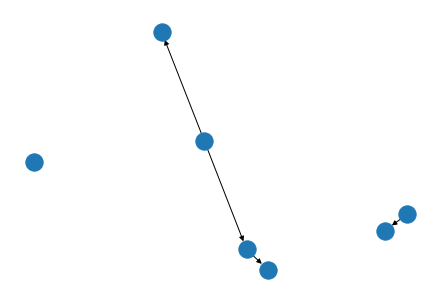

In [43]:
# Start by creating a directed graph
g = nx.DiGraph()

# Each user is a node in the graph
g.add_nodes_from(set(submissions['user'].append(comments['user'])))

# Each comment is a directed edge
pd.merge(submissions, comments, on='submission_id')
    .apply(lambda row: g.add_edge(row["user_x"], row["user_y"]), axis=1)

# Visualize the graph
nx.draw(g)
plt.show()